In [2]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment -I_class_II.xlsx');
df2 = pd.read_excel('F.A-2_class_II.xlsx');
df3 = pd.read_excel('Half Yearly Exam -2023_class_II.xlsx');

# In df3, where the Full Mark is not 100, multuply the Full Mark, Pass Mark and Marks Secured by 100/Full Mark
df3.loc[df3['Full Mark']!=100, 'Pass Mark'] = df3['Pass Mark']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Marks Secured'] = df3['Marks Secured']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Full Mark'] = df3['Full Mark']*100/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2023-2024,Formative Assessment -I,Offline,Computer,Evaluating,25,7,0 %,Swity kumari,II,A,1,23.5,Pass
1,2023-2024,Formative Assessment -I,Offline,English II,Evaluating,25,7,0 %,Swity kumari,II,A,1,25.0,Pass
2,2023-2024,Formative Assessment -I,Offline,Maths,Evaluating,25,7,0 %,Swity kumari,II,A,1,20.5,Pass
3,2023-2024,Formative Assessment -I,Offline,Hindi,Evaluating,25,7,0 %,Swity kumari,II,A,1,13.5,Pass
4,2023-2024,Formative Assessment -I,Offline,Assamese,Evaluating,25,7,0 %,Swity kumari,II,A,1,23.0,Pass


In [4]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  291
Student names with value 0 in marks secured column:  ['Chinmoy Rongpi' 'Abhinav Baruah' 'Suhani Singh' 'Trishanku Baruah'
 'Anushree Kakaki' 'Priyanshu Nath' 'Vishal Barman' 'Paridhi Roy'
 'Anshu Kumari' 'Bani Mishra' 'Tushar Sharma' 'Kapil Sharma'
 'Siya Chakraborty' 'Kasturi Das' 'Diya Barman' 'Trisha Das'
 'Ansuman Rabha' 'Roshan Basumatary']


In [6]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [7]:
# print the number of subjects
print('Number of Subjects: ', len(subjects)); 
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));
# Print the students
print('Students: ', students);
# print the number of exams
print('Number of Exams: ', len(exams));
# Print the exams
print('Exams: ', exams);

Number of Subjects:  10
Subjects:  ['Computer' 'English II' 'Maths' 'Hindi' 'Assamese' 'English I' 'EVS'
 'Drawing' 'General Knowledge' 'Moral Science']
Number of Students:  35
Students:  ['Swity kumari' 'Justina  Rongpee' 'Priyansi Giri' 'Chinmoy Rongpi'
 'Abhigyan Thapa' 'Abhinav Baruah' 'Ismita Nath' 'Farig Ahmed'
 'Suhani Singh' 'Trishanku Baruah' 'Dipanjali Kro' 'Anushree Kakaki'
 'Birat Mahato' 'Priyanshu Nath' 'Sahil Gupta' 'Musa Ali' 'Flora Engti'
 'Tilak dahal Chetri' 'Vishal Barman' 'Paridhi Roy' 'Neel Chaudhury'
 'Bani Mishra' 'Anshu Kumari' 'Angelina Boro' 'Roshan Basumatary'
 'Isha Thapa' 'Tushar Sharma' 'Kapil Sharma' 'Siya Chakraborty'
 'Diasy Rohang' 'Kasturi Das' 'Diya Barman' 'Karan chetri' 'Trisha Das'
 'Ansuman Rabha']
Number of Exams:  3
Exams:  ['Formative Assessment -I' 'F.A-2' 'Half Yearly Exam -2023']


In [8]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Swity kumari,II,A,1.0
1,Justina Rongpee,II,A,2.0
2,Priyansi Giri,II,A,3.0
3,Chinmoy Rongpi,II,A,4.0
4,Abhigyan Thapa,II,A,4.0


In [9]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -I_Computer,Formative Assessment -I_Computer_total,Formative Assessment -I_Computer_pass,Formative Assessment -I_English II,Formative Assessment -I_English II_total,Formative Assessment -I_English II_pass,...,Half Yearly Exam -2023_EVS_pass,Half Yearly Exam -2023_Drawing,Half Yearly Exam -2023_Drawing_total,Half Yearly Exam -2023_Drawing_pass,Half Yearly Exam -2023_General Knowledge,Half Yearly Exam -2023_General Knowledge_total,Half Yearly Exam -2023_General Knowledge_pass,Half Yearly Exam -2023_Moral Science,Half Yearly Exam -2023_Moral Science_total,Half Yearly Exam -2023_Moral Science_pass
0,Swity kumari,II,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Justina Rongpee,II,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Priyansi Giri,II,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chinmoy Rongpi,II,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abhigyan Thapa,II,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # check if the subject is present in the exam
            if df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                continue;
            
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -I_Computer,Formative Assessment -I_Computer_total,Formative Assessment -I_Computer_pass,Formative Assessment -I_English II,Formative Assessment -I_English II_total,Formative Assessment -I_English II_pass,...,Half Yearly Exam -2023_EVS_pass,Half Yearly Exam -2023_Drawing,Half Yearly Exam -2023_Drawing_total,Half Yearly Exam -2023_Drawing_pass,Half Yearly Exam -2023_General Knowledge,Half Yearly Exam -2023_General Knowledge_total,Half Yearly Exam -2023_General Knowledge_pass,Half Yearly Exam -2023_Moral Science,Half Yearly Exam -2023_Moral Science_total,Half Yearly Exam -2023_Moral Science_pass
0,Swity kumari,II,A,1.0,23.50,25,7,25.0,25,7,...,30,64,100,30,96,100,30,80,100,30
1,Justina Rongpee,II,A,2.0,24.50,25,7,22.0,25,7,...,30,84,100,30,92,100,30,74,100,30
2,Priyansi Giri,II,A,3.0,23.00,25,7,21.5,25,7,...,30,74,100,30,87,100,30,76,100,30
3,Chinmoy Rongpi,II,A,4.0,0.00,25,7,0.0,25,7,...,30,0,100,30,72,100,30,0,100,30
4,Abhigyan Thapa,II,A,4.0,21.25,25,7,19.5,25,7,...,30,54,100,30,52,100,30,46,100,30


In [13]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -I_Computer,Formative Assessment -I_Computer_total,Formative Assessment -I_Computer_pass,Formative Assessment -I_English II,Formative Assessment -I_English II_total,Formative Assessment -I_English II_pass,...,Weightage Computer,Weightage English II,Weightage Maths,Weightage Hindi,Weightage Assamese,Weightage English I,Weightage EVS,Weightage Drawing,Weightage General Knowledge,Weightage Moral Science
0,Swity kumari,II,A,1.0,23.50,25,7,25.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Justina Rongpee,II,A,2.0,24.50,25,7,22.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Priyansi Giri,II,A,3.0,23.00,25,7,21.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chinmoy Rongpi,II,A,4.0,0.00,25,7,0.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abhigyan Thapa,II,A,4.0,21.25,25,7,19.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    # If the subject is not present in FA1, FA2
    if df_new['Formative Assessment -I_' + subject].sum() == 0 or df_new['F.A-2_' + subject].sum() == 0:
        # Calculate the weightage for each subject by taking the 100% from Half Yearly
        df_new['Weightage ' + subject] = round(df_new['Half Yearly Exam -2023_' + subject] * 1, 2);
        # Calculate the full weightage for each subject by taking the 100% from Half Yearly
        df_new['Weightage ' + subject + ' total'] = df_new['Half Yearly Exam -2023_' + subject + '_total'] * 1;
    else:
        df_new['Weightage ' + subject] = round(df_new['Formative Assessment -I_' + subject] * 0.4 + df_new['F.A-2_' + subject] * 0.4 + df_new['Half Yearly Exam -2023_' + subject] * 0.8, 2);
        # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
        df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment -I_' + subject + '_total'] * 0.4 + df_new['F.A-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam -2023_' + subject + '_total'] * 0.8;

/tmp/ipykernel_15347/999990625.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment -I_' + subject + '_total'] * 0.4 + df_new['F.A-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam -2023_' + subject + '_total'] * 0.8;
/tmp/ipykernel_15347/999990625.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment -I_' + subject + '_total'] * 0.4 + df_new['F.A-2_' + subject + '_total'] * 0.

In [15]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

/tmp/ipykernel_15347/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');
/tmp/ipykernel_15347/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');
/tmp/ipykernel_15347/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  

In [16]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_15347/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment -I_Computer,Formative Assessment -I_Computer_total,Formative Assessment -I_Computer_pass,Formative Assessment -I_English II,Formative Assessment -I_English II_total,Formative Assessment -I_English II_pass,...,Result English II,Result Maths,Result Hindi,Result Assamese,Result English I,Result EVS,Result Drawing,Result General Knowledge,Result Moral Science,Total Weightage
0,Swity kumari,II,A,1.0,23.50,25,7,25.0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,870.40
1,Justina Rongpee,II,A,2.0,24.50,25,7,22.0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,886.20
2,Priyansi Giri,II,A,3.0,23.00,25,7,21.5,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,811.64
3,Chinmoy Rongpi,II,A,4.0,0.00,25,7,0.0,25,7,...,Fail,Fail,Fail,Fail,Fail,Fail,Fail,Pass,Fail,72.00
4,Abhigyan Thapa,II,A,4.0,21.25,25,7,19.5,25,7,...,Pass,Pass,Pass,Fail,Pass,Pass,Pass,Pass,Pass,515.10


In [17]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_15347/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [18]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [19]:
# Print the first row
df_new.iloc[0]

Student Name                        Swity kumari
Class                                         II
Section                                        A
Roll No                                      1.0
Formative Assessment -I_Computer            23.5
                                        ...     
Total Weightage                            870.4
Result                                      Pass
Total Marks                               1000.0
Percentage                                 87.04
Rank                                         2.0
Name: 0, Length: 129, dtype: object

In [20]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment -I_Computer,Formative Assessment -I_Computer_total,Formative Assessment -I_Computer_pass,Formative Assessment -I_English II,Formative Assessment -I_English II_total,Formative Assessment -I_English II_pass,...,Result English I,Result EVS,Result Drawing,Result General Knowledge,Result Moral Science,Total Weightage,Result,Total Marks,Percentage,Rank
0,Swity kumari,II,A,1.0,23.50,25,7,25.0,25,7,...,Pass,Pass,Pass,Pass,Pass,870.40,Pass,1000.0,87.040,2.0
1,Justina Rongpee,II,A,2.0,24.50,25,7,22.0,25,7,...,Pass,Pass,Pass,Pass,Pass,886.20,Pass,1000.0,88.620,1.0
2,Priyansi Giri,II,A,3.0,23.00,25,7,21.5,25,7,...,Pass,Pass,Pass,Pass,Pass,811.64,Pass,1000.0,81.164,3.0
3,Chinmoy Rongpi,II,A,4.0,0.00,25,7,0.0,25,7,...,Fail,Fail,Fail,Pass,Fail,72.00,Fail,1000.0,7.200,24.0
4,Abhigyan Thapa,II,A,4.0,21.25,25,7,19.5,25,7,...,Pass,Pass,Pass,Pass,Pass,515.10,Pass,1000.0,51.510,13.0
5,Abhinav Baruah,II,A,5.0,0.00,25,7,0.0,25,7,...,Fail,Fail,Fail,Fail,Fail,0.00,Fail,1000.0,0.000,30.5
6,Ismita Nath,II,A,5.0,23.00,25,7,23.0,25,7,...,Pass,Pass,Pass,Pass,Pass,677.28,Pass,1000.0,67.728,5.0
7,Farig Ahmed,II,A,6.0,22.00,25,7,24.0,25,7,...,Pass,Pass,Pass,Pass,Pass,654.60,Pass,1000.0,65.460,7.0
8,Suhani Singh,II,A,6.0,0.00,25,7,0.0,25,7,...,Fail,Fail,Fail,Fail,Fail,0.00,Fail,1000.0,0.000,30.5
9,Trishanku Baruah,II,A,7.0,8.00,25,7,3.5,25,7,...,Pass,Fail,Pass,Fail,Fail,240.20,Fail,1000.0,24.020,23.0


In [21]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

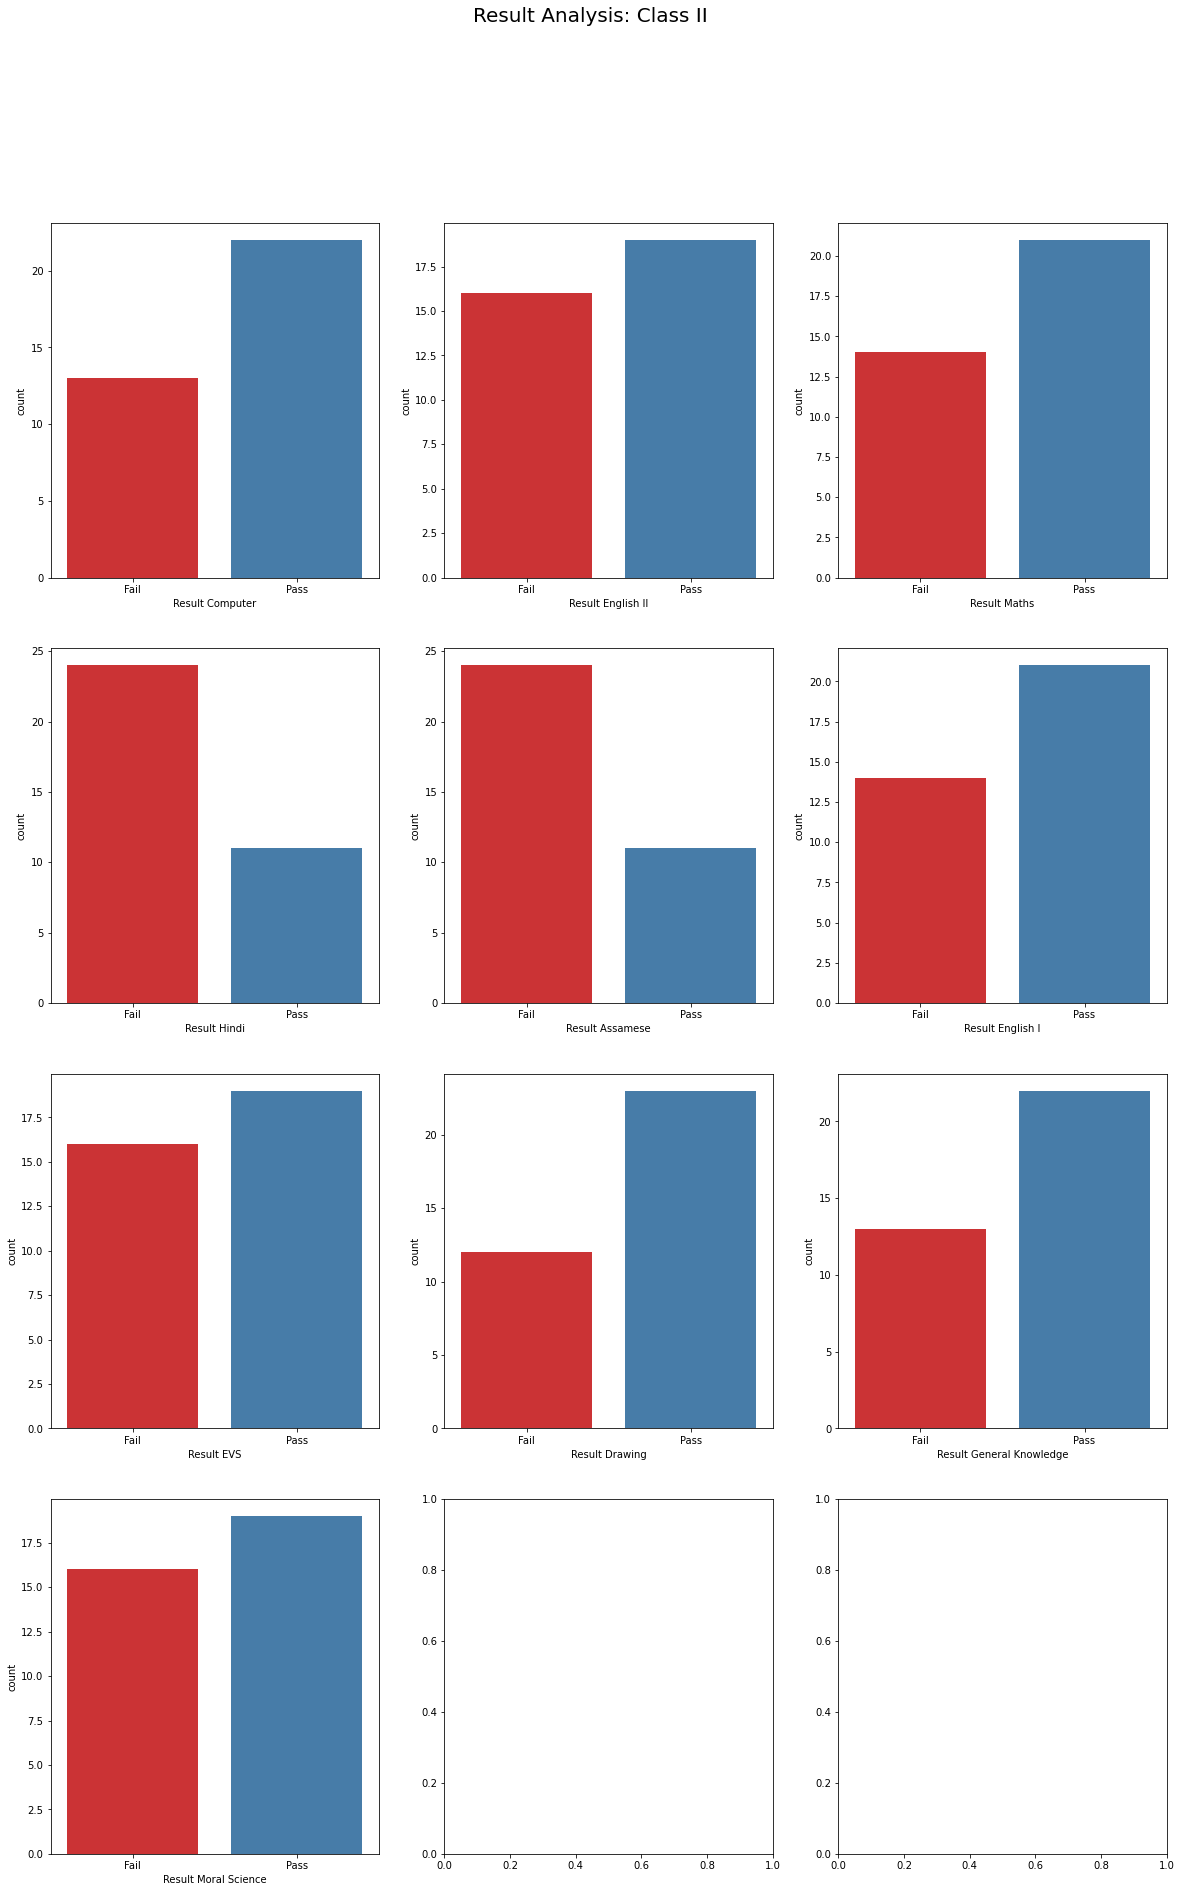

In [22]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Result Analysis: Class II', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();